# Youtube Stats Pulled Daily

# GadgetIn Daily Youtube Stats Notebook

This notebook updates the GadgetIn Daily Youtube Dataset. It appends with the latest stats and a `pull_date`.

In [15]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import config

In [9]:
channel_id = 'UC1dI4tO13ApuSX0QeX8pHng'
channel_ids = [
    'UCOmHUn--16B90oW2L6FRR3A', # Blackpink
    'UC1dI4tO13ApuSX0QeX8pHng', # gadgetin
    'UCVvhlqBpNVoG-DUT3J0oZ-w', # tara arts
]
youtube = build('youtube', 'v3', developerKey=config.api_key)

## Get Stats

In [10]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    video_count = response['items'][i]['statistics']['videoCount'],
                    )
        all_data.append(data)
        
    return all_data

In [11]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

[{'channel_name': 'GadgetIn',
  'subscribers': '9590000',
  'views': '2077478967',
  'video_count': '1250'},
 {'channel_name': 'Tara Arts Game Indonesia',
  'subscribers': '1270000',
  'views': '420942995',
  'video_count': '1932'},
 {'channel_name': 'BLACKPINK',
  'subscribers': '76200000',
  'views': '24700102398',
  'video_count': '397'}]

In [12]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,channel_name,subscribers,views,video_count
0,GadgetIn,9590000,2077478967,1250
1,Tara Arts Game Indonesia,1270000,420942995,1932
2,BLACKPINK,76200000,24700102398,397


In [14]:
channel_data['subscribers'] = pd.to_numeric(channel_data['subscribers'])
channel_data['views'] = pd.to_numeric(channel_data['views'])
channel_data['video_count'] = pd.to_numeric(channel_data['video_count'])
channel_data.dtypes

channel_name    object
subscribers      int64
views            int64
video_count      int64
dtype: object

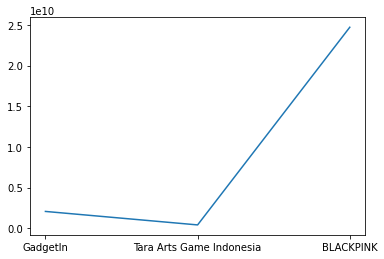

In [19]:
plt.plot(channel_data['channel_name'], channel_data['views']);